# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv("../API.env")

%matplotlib inline
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gaby/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
/Users/gaby/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
[nltk_data] Downloading package reuters to /Users/gaby/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/gaby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gaby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gaby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read your api key environment variable
api_key = os.getenv("newsapi")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 12800


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/richard-lawler',
 'title': "Tesla 'suspends' Bitcoin car purchases citing environmental impact",
 'description': "You can't buy a Tesla with Bitcoin anymore..",
 'url': 'https://www.engadget.com/elon-musk-bitcoin-221708146.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a0f90c30-b36f-11eb-aff6-04fb28cf2f4b',
 'publishedAt': '2021-05-12T22:17:08Z',
 'content': 'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 5149


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Manish Singh',
 'title': 'Vitalik Buterin donates $1 billion worth of ‘meme coins’ to India Covid Relief Fund',
 'description': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and “meme coins” worth $1.5 billion in one of the largest-ever individual philanthropy efforts. Buterin transferred 500 ETH and over 50 trillion SHIB (Shiba Inu), a meme coin, worth aroun…',
 'url': 'http://techcrunch.com/2021/05/12/vitalik-buterin-donates-1-billion-worth-of-meme-coins-to-india-covid-relief-fund/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2017/09/vitalik-buterin-147a2566.jpg?w=600',
 'publishedAt': '2021-05-12T22:46:10Z',
 'content': 'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.030956,0.050640,0.041980,0.907400
std,0.406329,0.066792,0.052431,0.078418
min,-0.762700,0.000000,0.000000,0.677000
25%,-0.273200,0.000000,0.000000,0.857750
50%,0.000000,0.000000,0.000000,0.914000
75%,0.323650,0.075750,0.073250,1.000000
max,0.845500,0.275000,0.203000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.077819,0.054840,0.035870,0.899270
std,0.355287,0.059582,0.060481,0.122247
min,-0.918600,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.846500
50%,0.000000,0.050500,0.000000,0.922500
75%,0.340000,0.082000,0.067500,1.000000
max,0.822500,0.256000,0.289000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', '/', ']', '[', '.', '--', '...', "'s", "'", '…'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    #regex = re.compile("[^a-zA-Z ]", words)
    
    #re_clean = regex.sub('', str(words))
    
    # Lemmatize words into root words
    #lem = [lemmatizer.lemmatize(word) for word in re_clean]
    
    # Convert the words to lowercase
    # Remove the stop words
    
    #tokens =list(filter(lambda w:[word.lower() for word in regex if word.lower() not in sw.union(sw_addon)]))
    
    return words

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw.union(sw_addon), words))
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, Tesla, started, accepting, Bitcoin, cur..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[Shares, Square, 6, today, American, fintech, ..."
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[Image, Tesla, Tesla, stopped, accepting, bitc..."
3,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[Illustration, Alex, Castro, Verge, Cryptocurr..."
4,2021-05-11,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.00,0.783,"[Mark, Zuckerberg, posted, picture, two, frank..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[Vitalik, Buterin, creator, Ethereum, Wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, Detrac..."
2,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[Solana, ’, known, yet, outside, crypto, commu..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[New, York, CNN, Business, Bitcoin, price, con..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, CryptoPunks, one, popular, N..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Elon', 'Musk'), 32),
 (('char', 'Reuters'), 12),
 (('char', 'Bitcoin'), 11),
 (('Reuters', 'Staff'), 11),
 (('currency', 'Bitcoin'), 10),
 (('virtual', 'currency'), 8),
 (('illustration', 'taken'), 8),
 (('2021', 'REUTERS/Dado'), 8),
 (('New', 'York'), 7),
 (('seen', 'front'), 7),
 (('bos', 'Elon'), 7),
 (('CEO', 'Elon'), 6),
 (('digital', 'currency'), 6),
 (('char', 'Tesla'), 5),
 (('Tesla', 'CEO'), 5),
 (('char', 'Elon'), 5),
 (('Tesla', 'Inc'), 5),
 (('purchase', 'vehicle'), 5),
 (('representation', 'virtual'), 5),
 (('front', 'stock'), 5)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('virtual', 'currency'), 11),
 (('illustration', 'taken'), 11),
 (('char', 'Bitcoin'), 10),
 (('2021', 'REUTERS/Dado'), 9),
 (('Reuters', 'Staff'), 8),
 (('representation', 'virtual'), 8),
 (('seen', 'front'), 8),
 (('front', 'stock'), 8),
 (('stock', 'graph'), 8),
 (('graph', 'illustration'), 8),
 (('char', 'Reuters'), 7),
 (('19', '2021'), 7),
 (('Vitalik', 'Buterin'), 6),
 (('currency', 'Ethereum'), 6),
 (('Ethereum', 'seen'), 6),
 (('taken', 'February'), 6),
 (('February', '19'), 6),
 (('digital', 'currency'), 6),
 (('Elon', 'Musk'), 6),
 (('char', 'representation'), 5)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=1):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
count_ten_btc = tokenizer(bitcoin_df.text.str.cat())
token_count(count_ten_btc, 10)

[('char', 100),
 ('Bitcoin', 52),
 ('Musk', 38),
 ('Tesla', 34),
 ('Elon', 34),
 ('bitcoin', 34),
 ('Reuters', 25),
 ('cryptocurrency', 23),
 ('currency', 20),
 ('company', 16)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
count_ten_eth = tokenizer(ethereum_df.text.str.cat())
token_count(count_ten_eth, 10)

[('char', 98),
 ('Bitcoin', 32),
 ('Ethereum', 28),
 ('currency', 22),
 ('bitcoin', 19),
 ('cryptocurrency', 18),
 ('Reuters', 18),
 ('crypto', 17),
 ('digital', 16),
 ('Monday', 14)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

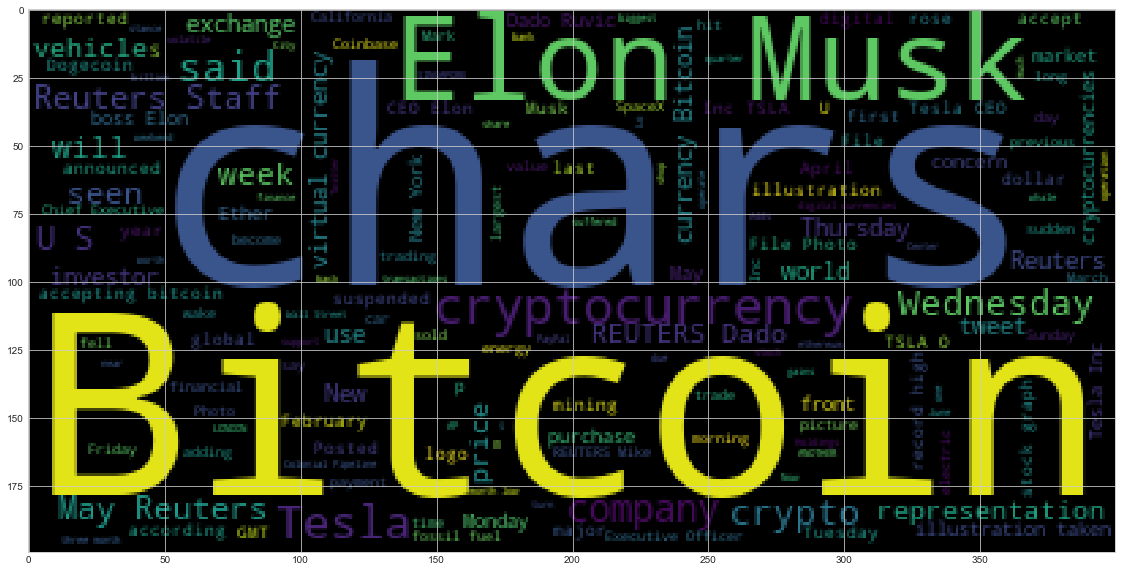

In [23]:
# Generate the Bitcoin word cloud
wc_btc =WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(wc_btc)

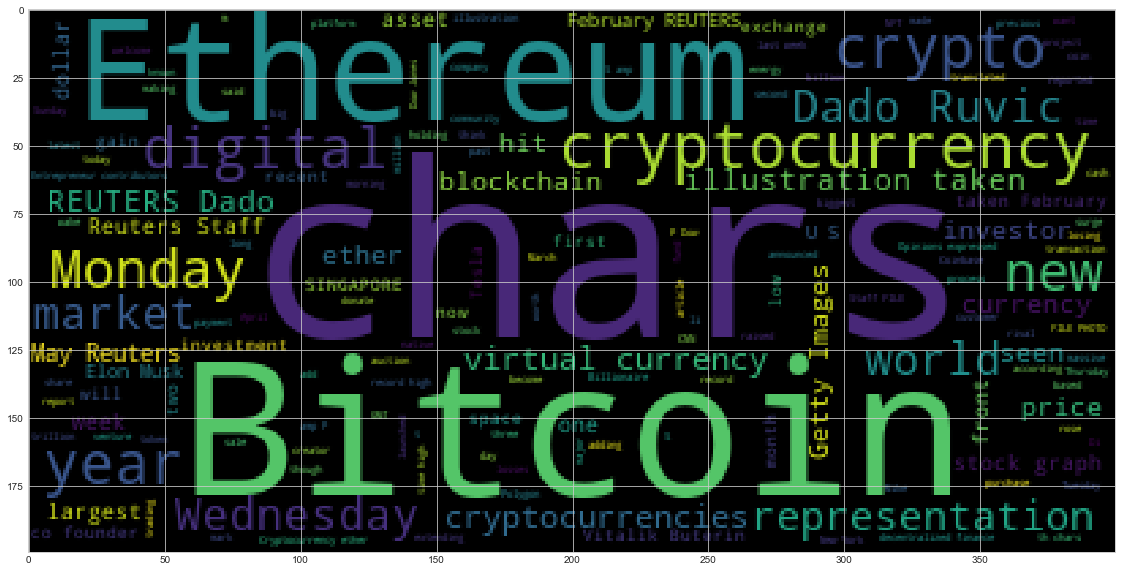

In [24]:
# Generate the Ethereum word cloud
wc_eth =WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
bit_conct = bitcoin_df.text.str.cat()

In [29]:
# Run the NER processor on all of the text
doc_btc = nlp(bit_conct)

# Add a title to the document
doc_btc.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [31]:
# List all Entities
#entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG']]
#print(entities)
for ent in doc_btc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Square FAC
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
Tesla ORG
Elon Musk PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
+1482 chars]Last week DATE
Musk PERSON
Dogecoin GPE
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
chars]Three years DATE
Babel Finance ORG
Monday DATE
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
hours-long TIME
this morning TIME
May 19th DATE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
more than 5,500 miles QUANTITY
the United States GPE
Photo PERSON
Michele Doying PERSON
Verge ORG
Iran GPE
Musk PERSO

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_conct = ethereum_df.text.str.cat()

In [33]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_conct)

# Add a title to the document
doc_eth.user_data["title"] = "Ethereum NER"

In [34]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [35]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
Anatoly Yakovenko PERSON
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/

---